# First test Pytorch

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("data_from_db.csv",sep="|")

In [5]:
# shape of my data
data.shape

(2481, 38)

In [6]:
data.head()

,lemma,occurrences,noun,verb,adjective,adverb,article,particle,conjunction,preposition,...,passive,middle,mediopassive,nom,gen,dat,acc,voc,loc,classe
0,ἀμφιπονέομαι,5,0.13333,0.04000,0.06667,0.04000,0.0,0.01333,0.01333,0.02667,...,0.00000,0.0000,0.01333,0.04000,0.01333,0.09333,0.08000,0.00000,0.0,1.0
1,σκάζω,4,0.10000,0.08333,0.10000,0.00000,0.0,0.00000,0.00000,0.03333,...,0.01667,0.0000,0.01667,0.11667,0.05000,0.01667,0.03333,0.00000,0.0,0.0
2,ὑπεξάγω,3,0.02222,0.04444,0.06667,0.06667,0.0,0.00000,0.02222,0.02222,...,0.00000,0.0000,0.00000,0.02222,0.00000,0.02222,0.06667,0.00000,0.0,0.0
3,πλέω,72,0.06944,0.05833,0.05093,0.02315,0.0,0.00833,0.00833,0.01111,...,0.00185,0.0037,0.01019,0.05000,0.02315,0.02593,0.04815,0.00093,0.0,0.0
4,ὑφίημι,2,0.23333,0.10000,0.03333,0.03333,0.0,0.00000,0.00000,0.10000,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.16667,0.10000,0.00000,0.0,NaN


In [7]:
data['classe'] = pd.Categorical(data['classe'])
data = data.dropna(0)

## Exploratory analysis

In [8]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

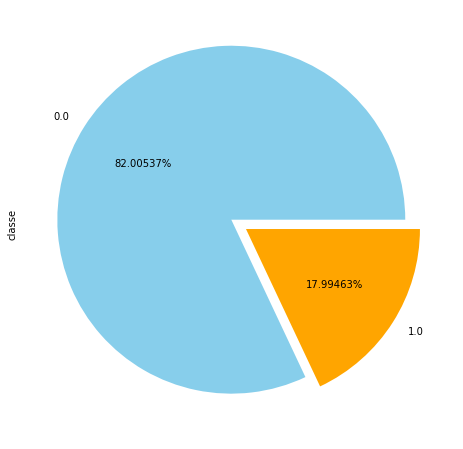

In [9]:
data['classe'].value_counts().plot(kind='pie', autopct='%1.5f%%', colors=['skyblue', 'orange','green'], explode=(0.05, 0.05))

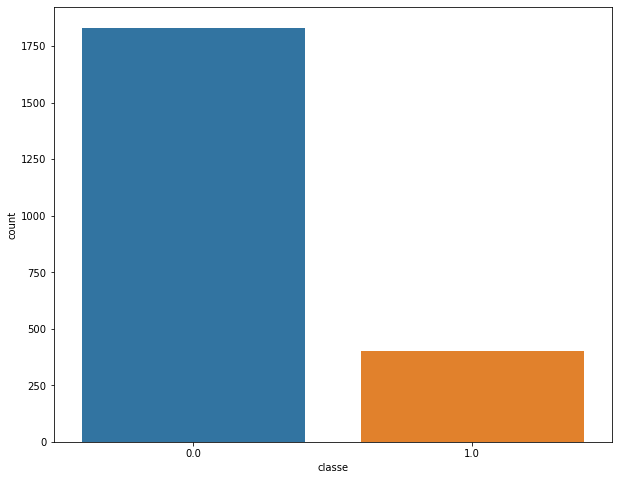

In [10]:
sns.countplot(x='classe', data=data)

In [11]:
list(data.columns)

['lemma',
 'occurrences',
 'noun',
 'verb',
 'adjective',
 'adverb',
 'article',
 'particle',
 'conjunction',
 'preposition',
 'pronoun',
 'numeral',
 'interjection',
 'punctuation',
 'present',
 'imperfect',
 'pluperfect',
 'perfect',
 'futPerfect',
 'future',
 'aorist',
 'indicative',
 'subjunctive',
 'optative',
 'infinitive',
 'imperative',
 'participle',
 'active',
 'passive',
 'middle',
 'mediopassive',
 'nom',
 'gen',
 'dat',
 'acc',
 'voc',
 'loc',
 'classe']

In [12]:
categorical_columns = ['lemma']
numerical_columns = ['occurrences', 'noun', 'verb', 'adjective', 'adverb',
       'article', 'particle', 'conjunction', 'preposition', 'pronoun',
       'numeral', 'interjection', 'punctuation', 'present', 'imperfect',
       'pluperfect', 'perfect', 'futPerfect', 'future', 'aorist', 'indicative',
       'subjunctive', 'optative', 'infinitive', 'imperative', 'participle',
       'active', 'passive', 'middle', 'mediopassive', 'nom', 'gen', 'dat',
       'acc', 'voc', 'loc']

In [13]:
outputs = ['classe']

In [14]:
data.dtypes

lemma             object
occurrences        int64
noun             float64
verb             float64
adjective        float64
adverb           float64
article          float64
particle         float64
conjunction      float64
preposition      float64
pronoun          float64
numeral          float64
interjection     float64
punctuation      float64
present          float64
imperfect        float64
pluperfect       float64
perfect          float64
futPerfect       float64
future           float64
aorist           float64
indicative       float64
subjunctive      float64
optative         float64
infinitive       float64
imperative       float64
participle       float64
active           float64
passive          float64
middle           float64
mediopassive     float64
nom              float64
gen              float64
dat              float64
acc              float64
voc              float64
loc              float64
classe          category
dtype: object

## Balancing

After training once I had the suspect that the model in doubt decides for active, since these are much more common. So let's try to reduce the data set so that we have equal probability of having a medium or active as output.

In [15]:
# exploration
print(f"Activa: {sum(data['classe'] == 0.0)} | Media : {sum(data['classe'] == 1.0)}")

Activa: 1832 | Media : 402


In [16]:
data = data.sort_values(by=['classe'])

In [17]:
data.head()

,lemma,occurrences,noun,verb,adjective,adverb,article,particle,conjunction,preposition,...,passive,middle,mediopassive,nom,gen,dat,acc,voc,loc,classe
1237,ἐπηπύω,2,0.20000,0.06667,0.06667,0.03333,0.0,0.03333,0.00000,0.03333,...,0.00000,0.03333,0.03333,0.06667,0.00000,0.06667,0.10000,0.03333,0.0,0.0
1582,ὑποδείδω,28,0.07619,0.08095,0.04762,0.02857,0.0,0.01429,0.01667,0.01190,...,0.00714,0.01190,0.01190,0.05000,0.02619,0.01905,0.06429,0.00000,0.0,0.0
1581,δαιδάλλω,4,0.13333,0.11667,0.11667,0.01667,0.0,0.00000,0.00000,0.03333,...,0.00000,0.01667,0.01667,0.01667,0.00000,0.05000,0.20000,0.00000,0.0,0.0
1580,ὑπεκπρορέω,3,0.06667,0.06667,0.06667,0.04444,0.0,0.02222,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.04444,0.00000,0.00000,0.11111,0.00000,0.0,0.0
1579,θαλπιάω,3,0.11111,0.04444,0.04444,0.06667,0.0,0.00000,0.02222,0.00000,...,0.00000,0.00000,0.02222,0.04444,0.00000,0.00000,0.11111,0.00000,0.0,0.0


In [18]:
data_a = data[0:400][['nom',"gen","dat","acc","voc","loc","classe"]]
data_m = data[1833:1833+400][['nom',"gen","dat","acc","voc","loc","classe"]]
frames = [data_a, data_m]
data = pd.concat(frames)

In [19]:
# exploration
print(f"Activa: {sum(data['classe'] == 0.0)} | Media : {sum(data['classe'] == 1.0)}")

Activa: 400 | Media : 400


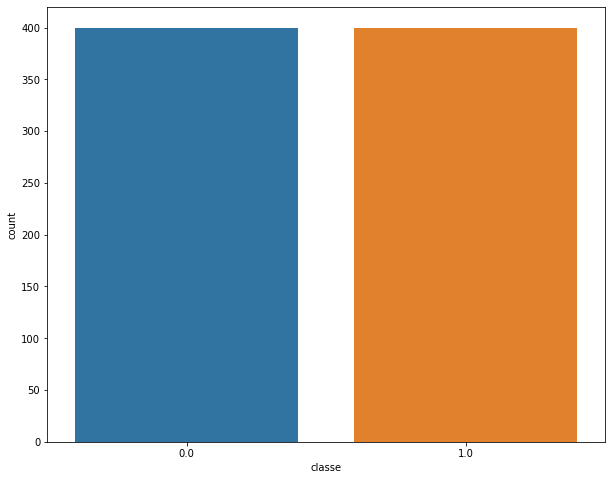

In [20]:
sns.countplot(x='classe', data=data)

In [21]:
data.head()

,nom,gen,dat,acc,voc,loc,classe
1237,0.06667,0.00000,0.06667,0.10000,0.03333,0.0,0.0
1582,0.05000,0.02619,0.01905,0.06429,0.00000,0.0,0.0
1581,0.01667,0.00000,0.05000,0.20000,0.00000,0.0,0.0
1580,0.04444,0.00000,0.00000,0.11111,0.00000,0.0,0.0
1579,0.04444,0.00000,0.00000,0.11111,0.00000,0.0,0.0


## Conversion to Vectors

In [22]:
### Testing

In [23]:
data.head()

,nom,gen,dat,acc,voc,loc,classe
1237,0.06667,0.00000,0.06667,0.10000,0.03333,0.0,0.0
1582,0.05000,0.02619,0.01905,0.06429,0.00000,0.0,0.0
1581,0.01667,0.00000,0.05000,0.20000,0.00000,0.0,0.0
1580,0.04444,0.00000,0.00000,0.11111,0.00000,0.0,0.0
1579,0.04444,0.00000,0.00000,0.11111,0.00000,0.0,0.0


In [24]:
# Split into variables and outputs

X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [25]:
# Splitting
from sklearn.model_selection import train_test_split

# take 20% of the data as test
trainInp, testInp, trainOut, testOut = train_test_split(X,y,test_size=0.20, random_state=69,shuffle=True)

In [26]:
trainInp.head()

,gen,dat,acc,voc,loc
1465,0.00000,0.00000,0.00000,0.0,0.0
115,0.05000,0.05000,0.05833,0.0,0.0
1461,0.00000,0.00000,0.04444,0.0,0.0
862,0.02963,0.02222,0.05926,0.0,0.0
2137,0.05000,0.03889,0.03333,0.0,0.0


In [27]:
trainOut.head()

1465    0.0
115     1.0
1461    0.0
862     1.0
2137    1.0
Name: classe, dtype: category
Categories (2, float64): [0.0, 1.0]

### Standardize inputs

We'll use here sklearn to standardize the values in the inputs, removing the mean and scaling everything to unit variance.

In [28]:
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler    
from sklearn.metrics import confusion_matrix, classification_report
scaler = StandardScaler()

In [29]:
trainInp = scaler.fit_transform(trainInp)
testInp = scaler.fit_transform(testInp)

### Custom Dataset

In [30]:
# Constants of the model
EPOCHS = 50
BATCH_SIZE = 20
L_RATE = 0.001

In [31]:
trainOut = torch.Tensor(trainOut.values)

In [32]:
class trainData(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

train_data = trainData(torch.FloatTensor(trainInp),torch.FloatTensor(trainOut,))

In [33]:
testOut = torch.tensor(testOut.values)
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(testInp))

In [34]:
trainLoader = DataLoader(train_data, batch_size=30, shuffle=True)

In [35]:
testLoader = DataLoader(test_data, shuffle=True, batch_size=1)

In [36]:
testInp.shape

(160, 5)

### Model

In [37]:
class Homeromai(nn.Module):
    def __init__(self):
        super(Homeromai,self).__init__()
        # kernel
        self.lin1 = nn.Linear(5,5)
        self.lin2 = nn.Linear(5,3)
        self.lin3 = nn.Linear(3,2)
        self.last = nn.Linear(2,1)
        self.activation = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.4)

    def forward(self, x):
        x = self.activation(self.lin1(x))
        x = self.activation(self.lin2(x))
        x = self.activation(self.lin3(x))
        x = self.dropout(x)
        x = self.last(x)
        return x

In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [51]:
model = Homeromai()
#model.to(device)
optimizer = optim.Adam(model.parameters(), lr=L_RATE)
criterium = nn.BCEWithLogitsLoss()

In [52]:
print(model)

Homeromai(
  (lin1): Linear(in_features=5, out_features=5, bias=True)
  (lin2): Linear(in_features=5, out_features=3, bias=True)
  (lin3): Linear(in_features=3, out_features=2, bias=True)
  (last): Linear(in_features=2, out_features=1, bias=True)
  (activation): Sigmoid()
  (dropout): Dropout(p=0.4, inplace=False)
)


In [53]:
# example
inp = train_data[0][0]#.to(device)
out = model(inp)#.to(device)
print(out)

tensor([-0.4183], grad_fn=<AddBackward0>)


In [54]:
def bin_accuracy(yhat, yobs):

    yhat_tag = torch.round(torch.sigmoid(yhat))
    correct = (yhat_tag == yobs).sum().float()
    acc = correct/yobs.shape[0]
    acc = torch.round(acc * 100)
    return acc

In [55]:
model.train()

Homeromai(
  (lin1): Linear(in_features=5, out_features=5, bias=True)
  (lin2): Linear(in_features=5, out_features=3, bias=True)
  (lin3): Linear(in_features=3, out_features=2, bias=True)
  (last): Linear(in_features=2, out_features=1, bias=True)
  (activation): Sigmoid()
  (dropout): Dropout(p=0.4, inplace=False)
)

In [56]:
for e in range(1,80):
    epoch_loss = 0
    epoch_acc = 0
    for x_data, x_out in trainLoader:
        
        #x_data, x_out = x_data.to(device), x_out.to(device) # move to GPU
        
        optimizer.zero_grad() # set gradients to zero
        
        yhat = model(x_data)
        
        loss = criterium(yhat,x_out.unsqueeze(1))
        acc = bin_accuracy(yhat,x_out.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(trainLoader):.5f} | Acc: {epoch_acc/len(trainLoader):.3f}')

Epoch 001: | Loss: 0.72387 | Acc: 50.045
Epoch 002: | Loss: 0.72687 | Acc: 49.091
Epoch 003: | Loss: 0.71779 | Acc: 50.136
Epoch 004: | Loss: 0.71117 | Acc: 49.409
Epoch 005: | Loss: 0.70843 | Acc: 49.955
Epoch 006: | Loss: 0.71537 | Acc: 49.364
Epoch 007: | Loss: 0.71344 | Acc: 48.773
Epoch 008: | Loss: 0.70628 | Acc: 50.000
Epoch 009: | Loss: 0.70633 | Acc: 48.545
Epoch 010: | Loss: 0.70907 | Acc: 49.409
Epoch 011: | Loss: 0.70789 | Acc: 48.182
Epoch 012: | Loss: 0.69975 | Acc: 51.682
Epoch 013: | Loss: 0.70438 | Acc: 48.182
Epoch 014: | Loss: 0.70285 | Acc: 49.045
Epoch 015: | Loss: 0.69816 | Acc: 52.591
Epoch 016: | Loss: 0.69972 | Acc: 50.727
Epoch 017: | Loss: 0.70398 | Acc: 48.909
Epoch 018: | Loss: 0.69700 | Acc: 52.500
Epoch 019: | Loss: 0.70194 | Acc: 50.455
Epoch 020: | Loss: 0.69903 | Acc: 51.000
Epoch 021: | Loss: 0.70254 | Acc: 49.318
Epoch 022: | Loss: 0.70067 | Acc: 49.727
Epoch 023: | Loss: 0.70624 | Acc: 47.909
Epoch 024: | Loss: 0.69728 | Acc: 49.682
Epoch 025: | Los

## Test the model

In [57]:
yhat_list = []
model.eval()

Homeromai(
  (lin1): Linear(in_features=5, out_features=5, bias=True)
  (lin2): Linear(in_features=5, out_features=3, bias=True)
  (lin3): Linear(in_features=3, out_features=2, bias=True)
  (last): Linear(in_features=2, out_features=1, bias=True)
  (activation): Sigmoid()
  (dropout): Dropout(p=0.4, inplace=False)
)

In [59]:
with torch.no_grad(): # do not use backpropagation (leave it as it is)
    for x_data in testLoader:
        x_data = x_data#.to(device)
        yhat = model(x_data)
        
        yhat = torch.sigmoid(yhat) # extract the p
        yhat_tag = torch.round(yhat)
        yhat_list.append(yhat_tag.cpu().numpy())
        
yhat_list = [a.squeeze().tolist() for a in yhat_list]

### Confusion Matrix

In [60]:
cm = confusion_matrix(testOut, yhat_list)
cm

array([[84,  0],
       [76,  0]], dtype=int64)

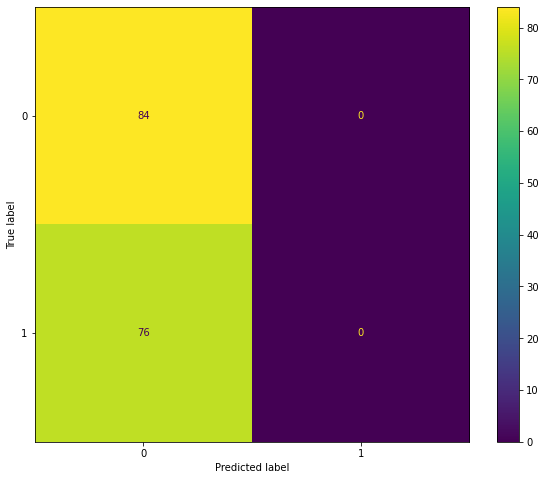

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [62]:
print(f"Medi azzeccati: {cm[0,0]/np.sum(cm)}\nAttivi azzeccati: {cm[1,1]/np.sum(cm)}\nMedi sbagliati: {cm[0,1]/np.sum(cm)}\nAttivi sbagliati: {cm[1,0]/np.sum(cm)}" )
print(f"\n\nRichtig: {(cm[0,0]+cm[1,1])/np.sum(cm)} %\nFalsch: {(cm[1,0]+cm[0,1])/np.sum(cm)} %")

Medi azzeccati: 0.525
Attivi azzeccati: 0.0
Medi sbagliati: 0.0
Attivi sbagliati: 0.475


Richtig: 0.525 %
Falsch: 0.475 %


In [ ]:
print(classification_report(testOut, yhat_list))

In [ ]:
for d in model.lin1.weight.data:
    print(f"Index : {(d == max(d)).nonzero()} | Max: {max(d)}")